In [18]:
import numpy as np

from keras import models
from keras import layers

time: 1.06 ms


### Preparing the data

Loading reuters dataset

In [83]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

time: 532 ms


In [84]:
print(len(train_data), len(test_data))

8982 2246
time: 1e+03 µs


In [86]:
print(max([max(sequence) for sequence in train_data]))

9999
time: 30.9 ms


### Converting integer vectors to binary metrix

In [87]:
def vectorize_sequence(sequence, dimention=10000):
  results = np.zeros((len(sequence), dimention))
  for i, seq in enumerate(sequence):
    results[i][seq] = 1.
  return results

time: 1.69 ms


In [88]:
x_train = vectorize_sequence(train_data)
x_test =  vectorize_sequence(test_data)

time: 360 ms


In [89]:
print(max(train_labels))

45
time: 1.54 ms


### Converting integer vectors (labels) to binary metrix (categories)

In [90]:
def to_one_hot(labels, dimention = 46):
  results = np.zeros((len(labels), dimention))
  for i, label in enumerate(labels):
    results[i][label] = 1.
  return results

time: 1.53 ms


In [91]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels  = to_one_hot(test_labels)

time: 10.1 ms


NOTE: To convert labels into categories, we can also use built-in method

In [92]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels  = to_categorical(test_labels)

time: 3.25 ms


### Building the network

In [93]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

time: 22.8 ms


### Compiling the model

In [94]:
from keras.optimizers import RMSprop
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy

model.compile(optimizer=RMSprop(learning_rate=0.001), 
              loss=categorical_crossentropy,
              metrics = [categorical_accuracy])

time: 37.3 ms


### Validation the approach

In [95]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

time: 2.68 ms


### Training the model

In [96]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size = 64,
                    epochs = 20,
                    validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 93us/step - loss: 1.6013 - categorical_accuracy: 0.6525 - val_loss: 1.1262 - val_categorical_accuracy: 0.7440
Epoch 2/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.8425 - categorical_accuracy: 0.8157 - val_loss: 0.9331 - val_categorical_accuracy: 0.8000
Epoch 3/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.5379 - categorical_accuracy: 0.8859 - val_loss: 0.8370 - val_categorical_accuracy: 0.8270
Epoch 4/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.3640 - categorical_accuracy: 0.9194 - val_loss: 0.8849 - val_categorical_accuracy: 0.8150
Epoch 5/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.2721 - categorical_accuracy: 0.9389 - val_loss: 0.8882 - val_categorical_accuracy: 0.8170
Epoch 6/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.2180 - categorical_accuracy:

In [97]:
history.history.keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])

time: 2.31 ms


### Plotting the training and validation loss

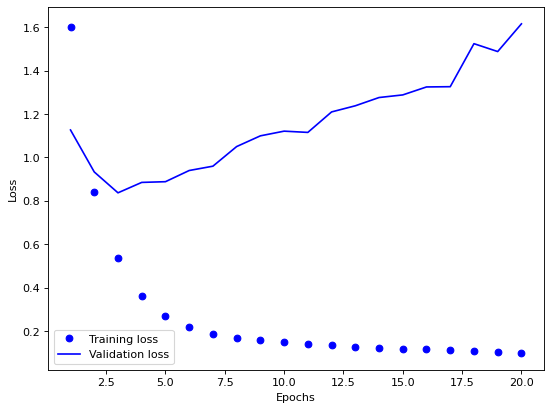

time: 166 ms


In [98]:
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

history_dic = history.history

acc = history_dic['categorical_accuracy']
val_acc = history_dic['val_categorical_accuracy']

loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Plotting the training and validation accuracy

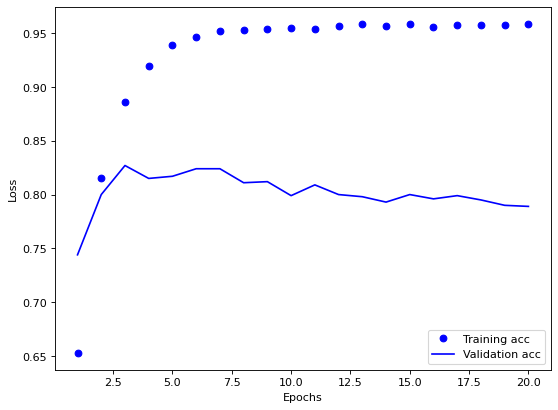

time: 182 ms


In [99]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from
scratch for nine epochs and then evaluate it on the test set.


###  Retraining a model from scratch

In [100]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train, 
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 66us/step - loss: 2.6598 - accuracy: 0.5377 - val_loss: 1.7748 - val_accuracy: 0.6490
Epoch 2/9
7982/7982 [==============================] - 0s 53us/step - loss: 1.4373 - accuracy: 0.7101 - val_loss: 1.3020 - val_accuracy: 0.7220
Epoch 3/9
7982/7982 [==============================] - 0s 52us/step - loss: 1.0431 - accuracy: 0.7804 - val_loss: 1.1169 - val_accuracy: 0.7560
Epoch 4/9
7982/7982 [==============================] - 0s 54us/step - loss: 0.8120 - accuracy: 0.8264 - val_loss: 1.0183 - val_accuracy: 0.7900
Epoch 5/9
7982/7982 [==============================] - 0s 53us/step - loss: 0.6441 - accuracy: 0.8664 - val_loss: 0.9576 - val_accuracy: 0.7940
Epoch 6/9
7982/7982 [==============================] - 0s 52us/step - loss: 0.5129 - accuracy: 0.8944 - val_loss: 0.9094 - val_accuracy: 0.8170
Epoch 7/9
7982/7982 [==============================] - 0s 51us/step - loss: 0.4121 - acc

time: 4.4 s


In [101]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 94us/step
time: 213 ms


In [102]:
results

[0.9835823410234595, 0.7916295528411865]

time: 2.23 ms


### Generating predictions for new data

In [104]:
predictions = model.predict(x_test)

time: 166 ms


In [106]:
 predictions[0].shape

(46,)

time: 1.93 ms


In [108]:
print(np.argmax(predictions[0]))

3
time: 1.26 ms
